In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lifelines as lf
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Survival

In [3]:
MK_surv = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/MK_lifelines.csv')

In [24]:
MK_surv.drop(MK_surv[MK_surv['Treatment'].str.contains('Naive')].index, inplace=True)

In [85]:
MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)'])['ID'].count()

Genotype  Treatment  Dosage (mg/kg)
KO        MK-801     0.5               15
                     1.0               20
          Saline     0.5               12
                     1.0               19
WT        MK-801     0.5                9
                     1.0               11
          Saline     0.5                9
                     1.0               11
Name: ID, dtype: int64

In [8]:
km_fit = lf.KaplanMeierFitter()

Text(0.5, 1.0, 'All Groups')

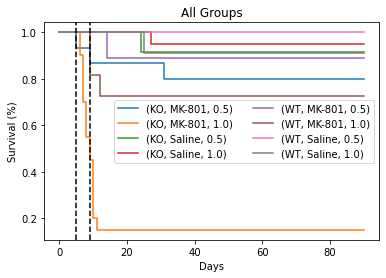

In [166]:
plt.figure()
ax=plt.subplot()
for name, grouped_df in MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False)
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2)
plt.axvline(5, ls='--', color = 'k')
plt.axvline(9, ls='--', color = 'k')
plt.title('All Groups')

In [32]:
MK_1mg = MK_surv[MK_surv['Dosage (mg/kg)']==1]

In [64]:
KM1_stats={'groups':[('KO_MK-801', 'KO_Saline'), ('KO_MK-801', 'WT_MK-801'), ('KO_MK-801', 'WT_Saline'), ('KO_Saline', 'WT_MK-801'), ('KO_Saline', 'WT_Saline'), ('WT_Saline', 'WT_MK-801')], 'p_vals':[], 'p_adjust':[]}

In [65]:
for group in KM1_stats['groups']:
    gen_1 = group[0].split('_')[0]
    tx_1 = group[0].split('_')[1]
    gen_2 = group[1].split('_')[0]
    tx_2 = group[1].split('_')[1]
    
    dur_1 = MK_1mg['Duration'][(MK_1mg['Genotype']==gen_1)&(MK_1mg['Treatment']==tx_1)]
    dur_2 = MK_1mg['Duration'][(MK_1mg['Genotype']==gen_2)&(MK_1mg['Treatment']==tx_2)]
    evt_1 = MK_1mg['Event'][(MK_1mg['Genotype']==gen_1)&(MK_1mg['Treatment']==tx_1)]
    evt_2 = MK_1mg['Event'][(MK_1mg['Genotype']==gen_2)&(MK_1mg['Treatment']==tx_2)]
    lr_ = lf.statistics.logrank_test(dur_1, dur_2, evt_1, evt_2)
    
    KM1_stats['p_vals'].append(lr_.p_value)

In [66]:
KM1_stats['p_vals']

[1.6652494716468945e-07,
 0.0014929687206982716,
 5.792679840738753e-05,
 0.07794326582172542,
 0.6699334128439183,
 0.2510604544355677]

In [67]:
bols, p_ad =pg.multicomp(KM1_stats['p_vals'], method = 'bonf')

In [68]:
KM1_stats['p_adjust'] = p_ad

In [69]:
KM1_stats['p_adjust']

array([9.99149683e-07, 8.95781232e-03, 3.47560790e-04, 4.67659595e-01,
       1.00000000e+00, 1.00000000e+00])

Text(0.5, 1.0, 'Dosage: 1mg/kg')

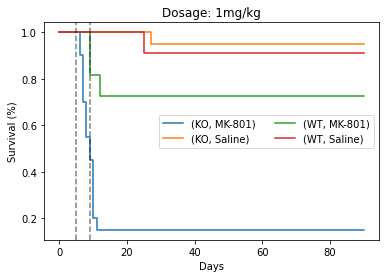

In [164]:
plt.figure()
ax=plt.subplot()
for name, grouped_df in MK_1mg.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False)
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2)
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.title('Dosage: 1mg/kg')

In [58]:
pd.DataFrame(KM1_stats) # Bonferroni correction

,groups,p_vals,p_adjust
0,"(KO_MK-801, KO_Saline)",1.665249e-07,9.991497e-07
1,"(KO_MK-801, WT_MK-801)",1.492969e-03,8.957812e-03
2,"(KO_MK-801, WT_Saline)",5.792680e-05,3.475608e-04
3,"(KO_Saline, WT_MK-801)",7.794327e-02,4.676596e-01
4,"(KO_Saline, WT_Saline)",6.699334e-01,1.000000e+00
5,"(WT_Saline, WT_MK-801)",2.510605e-01,1.000000e+00


In [61]:
MK_05mg = MK_surv[MK_surv['Dosage (mg/kg)']==.5]

In [70]:
KM05_stats={'groups':[('KO_MK-801', 'KO_Saline'), ('KO_MK-801', 'WT_MK-801'), ('KO_MK-801', 'WT_Saline'), ('KO_Saline', 'WT_MK-801'), ('KO_Saline', 'WT_Saline'), ('WT_Saline', 'WT_MK-801')], 'p_vals':[], 'p_adjust':[]}


In [71]:
for group in KM05_stats['groups']:
    gen_1 = group[0].split('_')[0]
    tx_1 = group[0].split('_')[1]
    gen_2 = group[1].split('_')[0]
    tx_2 = group[1].split('_')[1]
    
    dur_1 = MK_05mg['Duration'][(MK_05mg['Genotype']==gen_1)&(MK_05mg['Treatment']==tx_1)]
    dur_2 = MK_05mg['Duration'][(MK_05mg['Genotype']==gen_2)&(MK_05mg['Treatment']==tx_2)]
    evt_1 = MK_05mg['Event'][(MK_05mg['Genotype']==gen_1)&(MK_05mg['Treatment']==tx_1)]
    evt_2 = MK_05mg['Event'][(MK_05mg['Genotype']==gen_2)&(MK_05mg['Treatment']==tx_2)]
    lr_ = lf.statistics.logrank_test(dur_1, dur_2, evt_1, evt_2)
    
    KM05_stats['p_vals'].append(lr_.p_value)

In [81]:
bols, p_ad05 =pg.multicomp(KM05_stats['p_vals'], method = 'bonf')

In [82]:
KM05_stats['p_adjust'] = p_ad05

Text(0.5, 1.0, 'Dosage: 0.5mg/kg')

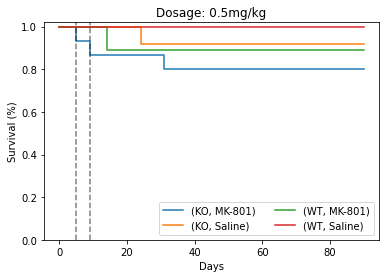

In [165]:
plt.figure()
ax=plt.subplot()
for name, grouped_df in MK_05mg.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False)
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2)
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.ylim(0, 1.02)
plt.title('Dosage: 0.5mg/kg')

In [83]:
pd.DataFrame(KM05_stats) # Bonferroni correction

,groups,p_vals,p_adjust
0,"(KO_MK-801, KO_Saline)",0.396906,1.000000
1,"(KO_MK-801, WT_MK-801)",0.568160,1.000000
2,"(KO_MK-801, WT_Saline)",0.164305,0.985832
3,"(KO_Saline, WT_MK-801)",0.805541,1.000000
4,"(KO_Saline, WT_Saline)",0.386476,1.000000
5,"(WT_Saline, WT_MK-801)",0.317311,1.000000


## Growth

In [310]:
MK_grow = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Pesos.csv')

In [311]:
MK_grow.dropna(how='all', inplace = True)

In [312]:
MK_grow.drop(MK_grow.tail(1).index, inplace = True)

In [313]:
MK_grow.columns

Index(['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '40', '45', '50', '55', '60', '65',
       '70', '75', '80', '85', '90'],
      dtype='object')

In [317]:
mk_g['Day'] = mk_g['Day'].astype('float')

In [315]:
mk_g= MK_grow.melt(id_vars=['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex'], var_name='Day', value_name = 'Weight')

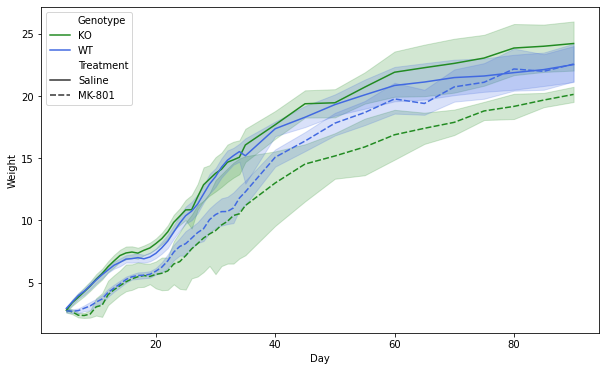

In [320]:
plt.figure(figsize=(10,6))
sns.lineplot(data = mk_g[mk_g['Dosage (mg/kg)']==1], x ='Day', y='Weight', hue='Genotype', style='Treatment', palette=['forestgreen', 'royalblue'])

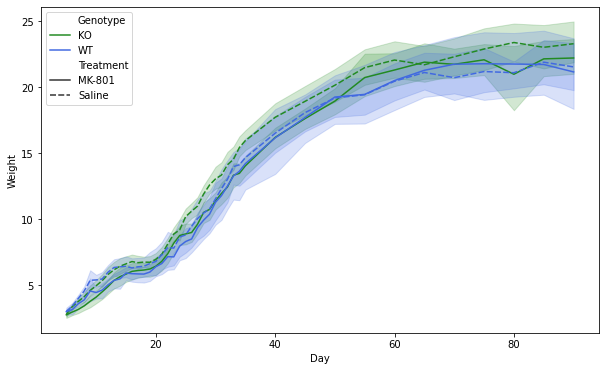

In [322]:
plt.figure(figsize=(10,6))
sns.lineplot(data = mk_g[mk_g['Dosage (mg/kg)']==0.5], x ='Day', y='Weight', hue='Genotype', style='Treatment', palette=['forestgreen', 'royalblue'])

## Nesting

In [2]:
nest_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Nesting Data.csv')

In [3]:
nest_r['Group'] = nest_r['Genotype']+nest_r['Tx']

In [4]:
nest_r.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Nesting Score'].count()

Genotype  Tx       Dose (mg/Kg)
KO        MK-801   0.5             13
                   1.0              3
          Saline   0.5             11
                   1.0             18
WT        MK-801   0.5              8
                   1.0              8
          Saline   0.5              9
                   1.0             10
Name: Nesting Score, dtype: int64

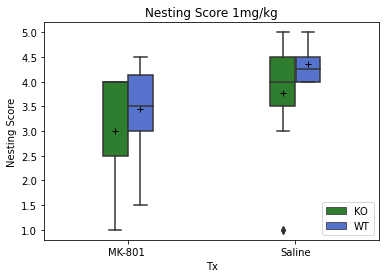

In [5]:
sns.boxplot(data=nest_r[nest_r['Dose (mg/Kg)']==1], x='Tx', y='Nesting Score', hue='Genotype', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue'])
plt.title('Nesting Score 1mg/kg')
plt.legend(loc=4)


### Effects of MK-801 on WT mice

In [6]:
pg.normality(data= nest_r[(nest_r['Dose (mg/Kg)']==1)&(nest_r['Genotype']=='WT')], dv = 'Nesting Score', group='Tx', method='normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
MK-801,2.739172,0.254212,True
Saline,1.690373,0.429477,True


In [7]:
mk_wt = nest_r['Nesting Score'][(nest_r['Dose (mg/Kg)']==1)&(nest_r['Genotype']=='WT')& (nest_r['Tx']=='MK-801 ')]
sl_wt = nest_r['Nesting Score'][(nest_r['Dose (mg/Kg)']==1)&(nest_r['Genotype']=='WT')& (nest_r['Tx']=='Saline')]
pg.ttest(mk_wt, sl_wt)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-2.466017,8.977568,two-sided,0.035866,"[-1.75, -0.08]",1.271249,2.71,0.711138


#### MK-801 1mg/kg affects nesting in WT mice

In [8]:
pg.normality(data= nest_r[nest_r['Tx']=='Saline'], dv = 'Nesting Score', group='Genotype', method='normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
KO,11.012870,0.004061,False
WT,16.327631,0.000285,False


### Saline mice KO vs WT

In [9]:
sl_wt = nest_r['Nesting Score'][(nest_r['Genotype']=='WT')&(nest_r['Tx']=='Saline')]
sl_ko = nest_r['Nesting Score'][(nest_r['Genotype']=='KO')&(nest_r['Tx']=='Saline')]
pg.mwu(sl_wt, sl_ko)

,U-val,tail,p-val,RBC,CLES
MWU,274.0,two-sided,0.982775,0.005445,0.419238


#### NO difference by genotype

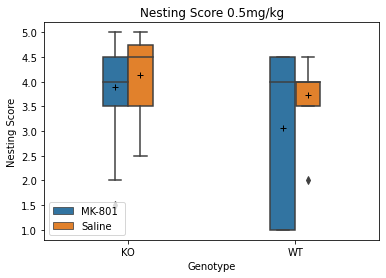

In [10]:
sns.boxplot(data=nest_r[nest_r['Dose (mg/Kg)']==0.5], x='Genotype', y='Nesting Score', hue='Tx', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3)
plt.title('Nesting Score 0.5mg/kg')
plt.legend(loc=3)

In [11]:
pg.normality(data= nest_r[(nest_r['Dose (mg/Kg)']==0.5)&(nest_r['Genotype']=='WT')], dv = 'Nesting Score', group='Tx')

,W,pval,normal
MK-801,0.710835,0.002985,False
Saline,0.740435,0.004199,False


In [12]:
mk_wt = nest_r['Nesting Score'][(nest_r['Dose (mg/Kg)']==0.5)&(nest_r['Genotype']=='WT')& (nest_r['Tx']=='MK-801 ')]
sl_wt = nest_r['Nesting Score'][(nest_r['Dose (mg/Kg)']==0.5)&(nest_r['Genotype']=='WT')& (nest_r['Tx']=='Saline')]
pg.mwu(mk_wt, sl_wt)

,U-val,tail,p-val,RBC,CLES
MWU,36.5,two-sided,1.0,-0.013889,0.416667


### NO effect on WT mice (0.5mg/kg)

In [13]:
pg.normality(data= nest_r[nest_r['Dose (mg/Kg)']==0.5], dv='Nesting Score', group='Group')

,W,pval,normal
KOMK-801,0.860936,0.039634,False
KOSaline,0.831670,0.024556,False
WTMK-801,0.710835,0.002985,False
WTSaline,0.740435,0.004199,False


In [14]:
pg.homoscedasticity(data= nest_r[nest_r['Dose (mg/Kg)']==0.5], dv='Nesting Score', group='Group')

,W,pval,equal_var
levene,1.667449,0.19073,True


In [15]:
pg.kruskal(nest_r[nest_r['Dose (mg/Kg)']==0.5], dv='Nesting Score', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,3,3.491666,0.321845


#### NO effect over all

## Burrowing

In [71]:
burr_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Burrowing.csv')

In [72]:
burr_r = burr_r[burr_r.Tx !='Naive']

In [73]:
burr_tidy = burr_r[['Genotype', 'Tx', 'Dose (mg/Kg)', 'Sub', '% Test (12 h)']]

In [74]:
burr_tidy[burr_tidy['Tx'] == 'MK-801 ']

,Genotype,Tx,Dose (mg/Kg),Sub,% Test (12 h)


In [75]:
burr_tidy['Tx'].unique()

array(['MK-801', 'Saline'], dtype=object)

In [76]:
burr_tidy.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
KO        MK-801  0.5             12
                  1.0              3
          Saline  0.5             11
                  1.0             18
WT        MK-801  0.5              8
                  1.0              8
          Saline  0.5              9
                  1.0             10
Name: Sub, dtype: int64

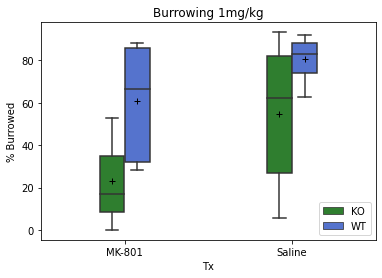

In [77]:
sns.boxplot(data=burr_tidy[burr_tidy['Dose (mg/Kg)']==1], x='Tx', y='% Test (12 h)', hue='Genotype', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue'])
plt.title('Burrowing 1mg/kg')
plt.ylabel('% Burrowed')
plt.legend(loc=4)


### Effect of genotype on burrowing

Text(0, 0.5, '% Burrowed')

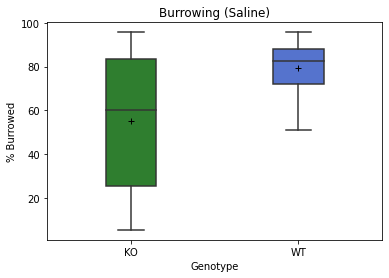

In [85]:
sns.boxplot(data=burr_tidy[(burr_tidy['Tx']=='Saline')], x='Genotype', y='% Test (12 h)', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue'])
plt.title('Burrowing (Saline)')
plt.ylabel('% Burrowed')

In [86]:
pg.normality(data=burr_tidy[(burr_tidy['Tx']=='Saline')&(burr_tidy['Dose (mg/Kg)']==1)], dv='% Test (12 h)', group='Genotype', method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
KO,6.530297,0.038191,False
WT,1.094504,0.578537,True


In [87]:
pg.mwu(burr_tidy['% Test (12 h)'][(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='KO')], burr_tidy['% Test (12 h)'][(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='WT')])

,U-val,tail,p-val,RBC,CLES
MWU,132.0,two-sided,0.018311,0.431034,0.715517


In [82]:
outliers = pg.madmedianrule(burr_tidy['% Test (12 h)'][(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='WT')])

In [96]:
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False])

In [83]:
out_idx = burr_tidy['% Test (12 h)'][(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='WT')][outliers]

In [97]:
out_idx

45    15.2225
48     5.4550
57    25.4675
Name: % Test (12 h), dtype: float64

In [84]:
burr_tidy.drop(out_idx.index, inplace=True)

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Effect of MK-801 1mg/kg on WT mice

In [88]:
pg.normality(data = burr_tidy[(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')], dv='% Test (12 h)', group='Tx', method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
MK-801,5.255871,0.072227,True
Saline,1.094504,0.578537,True


In [103]:
wt_sl = burr_tidy['% Test (12 h)'][(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')&(burr_tidy['Tx']== 'Saline')]
wt_mk = burr_tidy['% Test (12 h)'][(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')&(burr_tidy['Tx']== 'MK-801')]

In [104]:
pg.ttest(wt_sl, wt_mk)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.939807,8.360214,two-sided,0.086807,"[-3.58, 43.41]",1.010153,1.391,0.516451


#### no net effect but very low power

### MK-801 0.5mg/kg

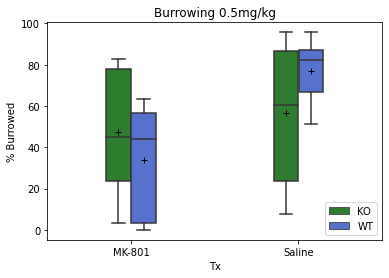

In [105]:
sns.boxplot(data=burr_tidy[burr_tidy['Dose (mg/Kg)']==0.5], x='Tx', y='% Test (12 h)', hue='Genotype', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue'])
plt.title('Burrowing 0.5mg/kg')
plt.ylabel('% Burrowed')
plt.legend(loc=4)
